# Project code showing models and tests

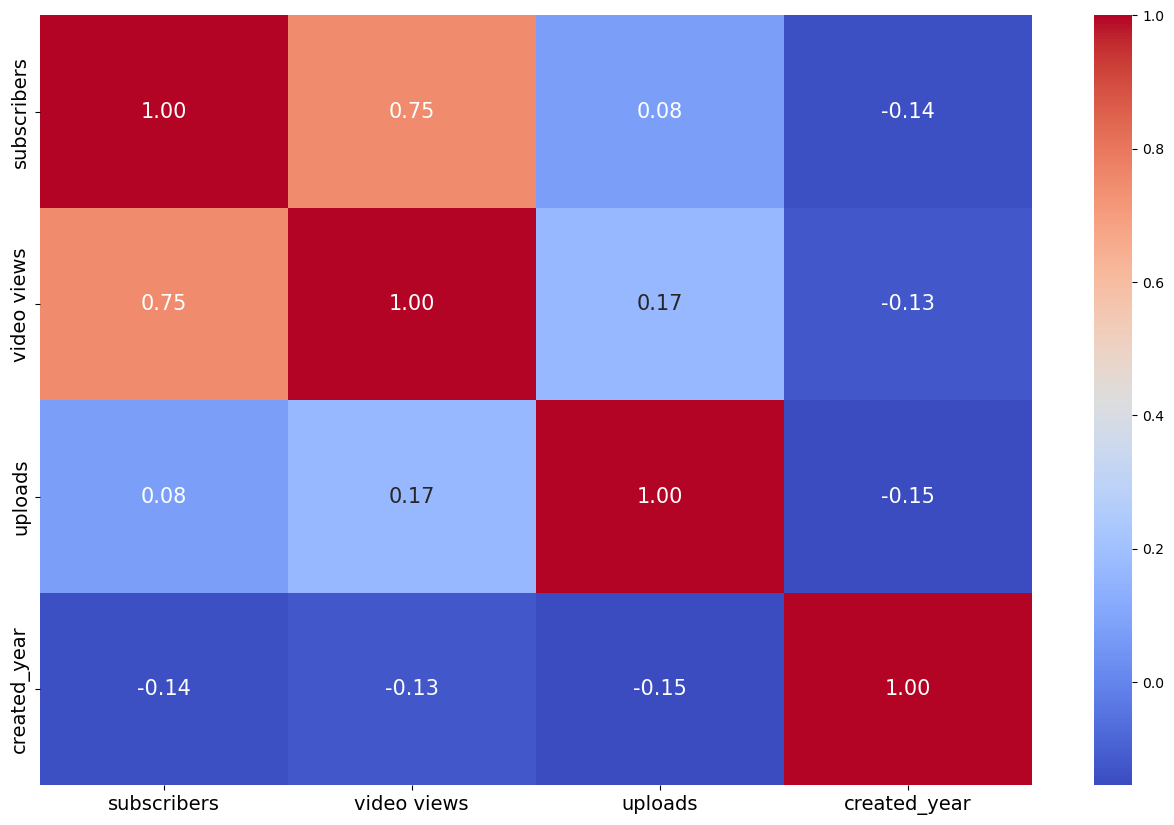

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import seaborn as sns

#First need to read in the csv file that has the data set 
#Next we dropped unwanted data from the set only keeping subscribers, video views, uploads
df = pd.read_csv('Global YouTube Statistics.csv')
df = df.drop(['rank', 'Abbreviation', 'country_rank', 'created_month',
             'created_date', 'Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'channel_type_rank', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings','lowest_yearly_earnings', 'subscribers_for_last_30_days','Population','Latitude','Longitude','video_views_rank','highest_yearly_earnings'], axis=1)
df['created_year'] = pd.to_numeric(df['created_year'], errors='coerce')
numeric_columns = ['subscribers', 'video views', 'uploads', 'created_year']
#Set up ranks for each of the variables we kept that will help when creating the correlation heatmap
rank_analysis = df[numeric_columns].corr()
correlation_matrix = rank_analysis
plt.figure(figsize=(16,10))
#Generate the heat map using our rank analysis and setting the features based on the colors
sns.heatmap(rank_analysis, annot=True,cmap='coolwarm', fmt='.2f',annot_kws={'size':15})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [37]:
#Describe function to show our mean, median, std, and range for each of our variables.
df.describe()

,subscribers,video views,uploads,created_year
count,9.950000e+02,9.950000e+02,995.000000,990.000000
mean,2.298241e+07,1.103954e+10,9187.125628,2012.630303
std,1.752611e+07,1.411084e+10,34151.352254,4.512503
min,1.230000e+07,0.000000e+00,0.000000,1970.000000
25%,1.450000e+07,4.288145e+09,194.500000,2009.000000
50%,1.770000e+07,7.760820e+09,729.000000,2013.000000
75%,2.460000e+07,1.355470e+10,2667.500000,2016.000000
max,2.450000e+08,2.280000e+11,301308.000000,2022.000000


# Top 10 youtube channels by num of subscribers graph

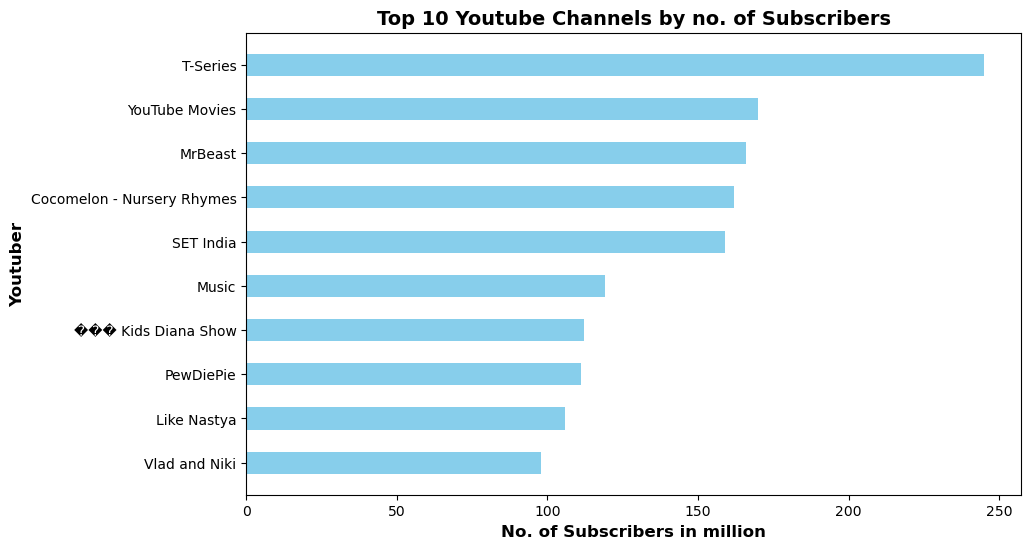

In [40]:
#Select the columns we want to compare to make the graph
colms= ['Youtuber', 'subscribers']

#Then to keep the graph easier to read we will just choose the top 10 channels 
bar_colms= df.loc[0:9, colms]
bar_colms= bar_colms.sort_values('subscribers', ascending = True)

#We will set the number to millions to categorize the subscriber count
bar_colms['subscribers (MM)'] = (bar_colms['subscribers'] / 1000000).astype(int)

#Adding the x and y coordinates to the graph and creating a figure size 
bar_colms
x= bar_colms['Youtuber']
y= bar_colms['subscribers (MM)']
fig = plt.figure(figsize =(10, 6))
 
#Then we will create the bar plot and choose the details for it with the labels
plt.barh(x, y, color= 'skyblue', height= 0.5 )
plt.xlabel("No. of Subscribers in million", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by no. of Subscribers", weight='bold', fontsize = 14)
plt.show()

# Top 10 youtube channels by num of video views graph

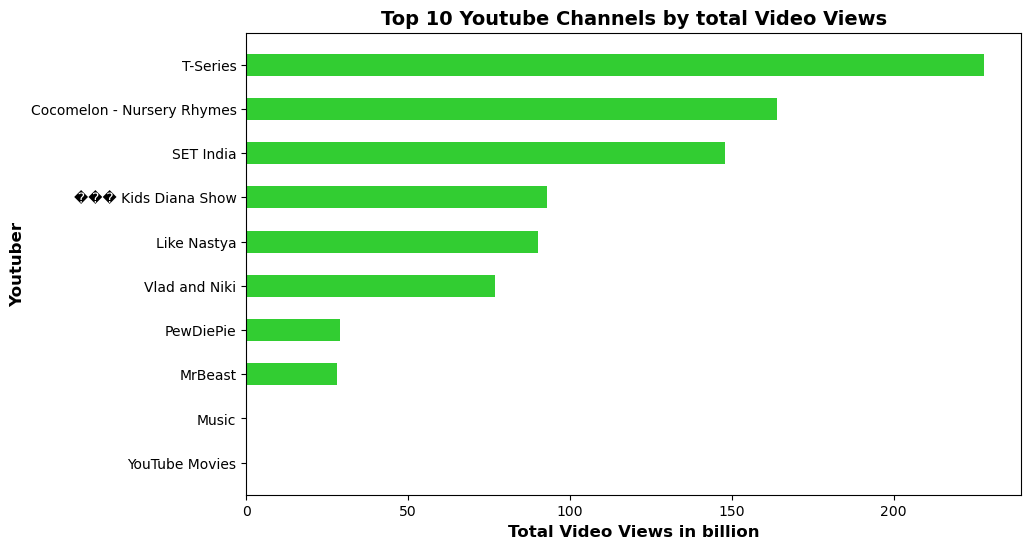

In [43]:
#Select the columns we will compare in this case its Yotuber with video views
colms= ['Youtuber', 'video views']

#Then to keep the graph easier to read we will just choose the top 10 channels 
bar_colms= df.loc[0:9, colms]
bar_colms= bar_colms.sort_values('video views', ascending = True)

#We will set the number to billions to categorize the view count
bar_colms['video views (bil)'] = (bar_colms['video views'] / 1000000000).astype(int)
bar_colms

#Adding the x and y coordinates to the graph and creating a figure size
x= bar_colms['Youtuber']
y= bar_colms['video views (bil)']
fig = plt.figure(figsize =(10, 6))
 
#Then we will create the bar plot and choose the details for it with the labels
plt.barh(x, y, color= 'limegreen', height= 0.5 )
plt.xlabel("Total Video Views in billion", weight='bold', fontsize = 12)
plt.ylabel("Youtuber", weight='bold', fontsize = 12)
plt.title("Top 10 Youtube Channels by total Video Views", weight='bold', fontsize = 14)
plt.show()

# Pair Plots for comparing variables

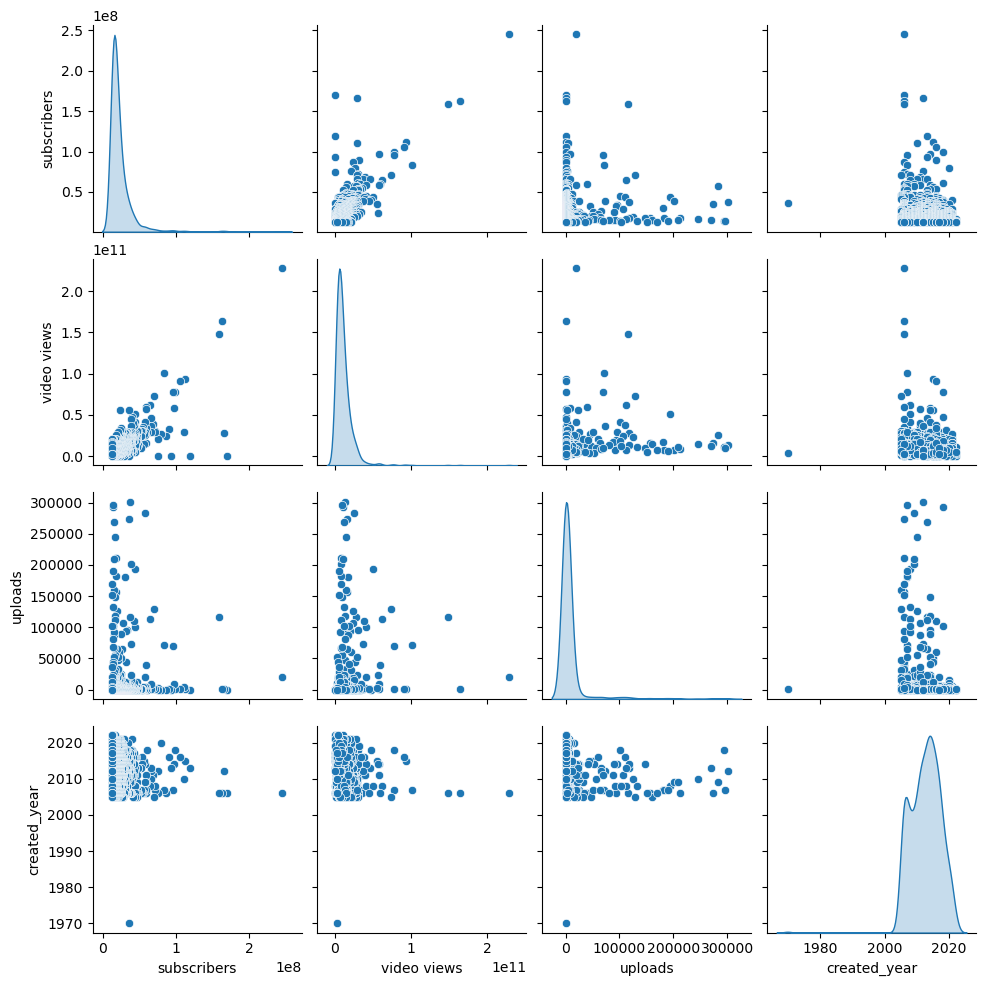

In [48]:
#To create a seaborn pairplot for each variable 
#We will use this to show relationships between the variables
sns.pairplot(df[['subscribers', 'video views', 'uploads', 'created_year']], diag_kind='kde')
plt.show()

# Linear Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Set up our X (dependent) and y (independent) variables 
X = X.dropna()
y = y[X.index]

#Set up the train and test varibales that will be used to split up the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Intialize our Linear regression model and fit the data to it
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions based on our model
y_pred = model.predict(X_test)

#Evaluate the model to get the mse and r^2 value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Print out the mse and r2
print(mse, r2)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")

55699604996683.54 0.588257674377571
R-squared: 0.59


# Residuals Distribution Plot

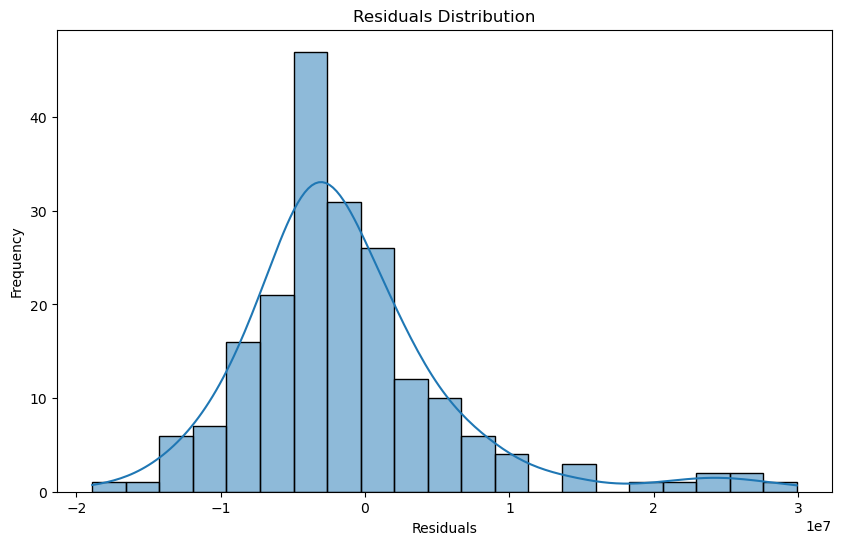

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate the residuals which is the actual - predicted values
residuals = y_test - y_pred

#Plot the residuals to get the graph
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Residual Scatter Plot

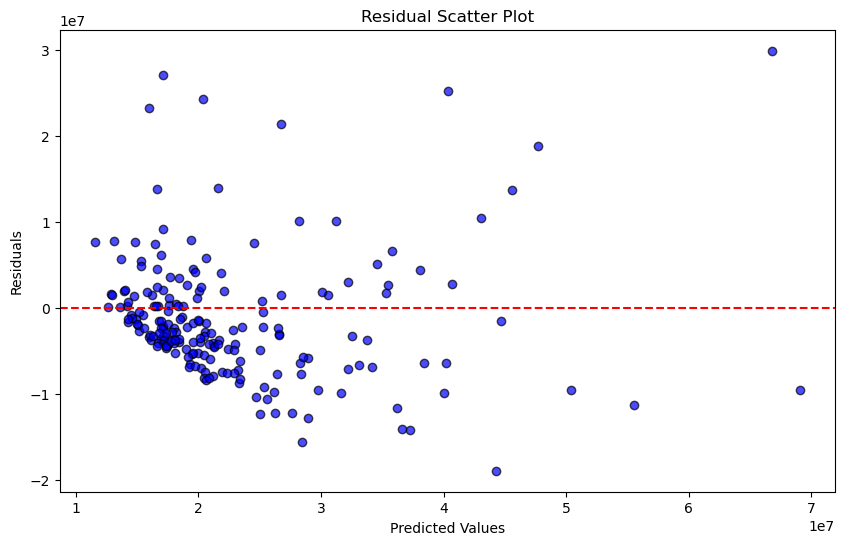

In [61]:
#Use the above data to create a scatter plot for it
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line to show the baseline
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Scatter Plot")
plt.show()

# Linearity Tests

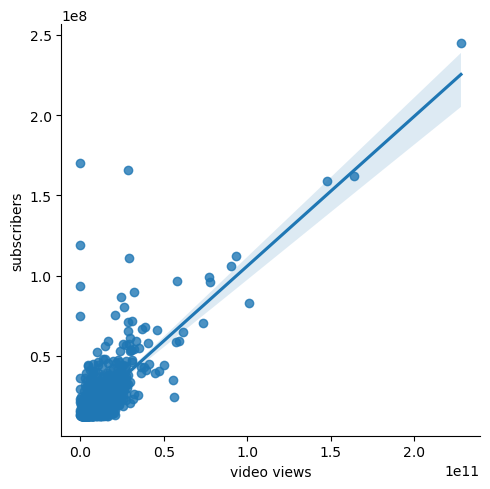

In [64]:
#Linearity Tests for video views and subscribers 
sns.lmplot(x='video views', y='subscribers', data = df)

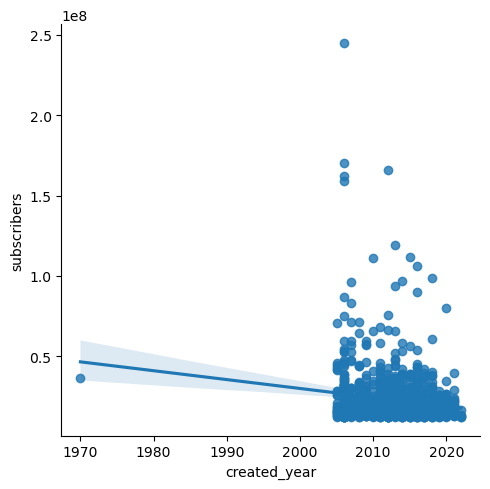

In [66]:
#Linearity Tests for highest yearly earnings and subscribers 
sns.lmplot(x='created_year', y='subscribers', data = df)

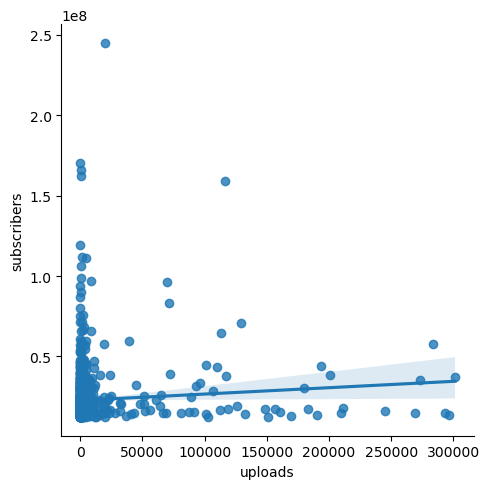

In [68]:
#Linearity Tests for uploads and subscribers 
sns.lmplot(x='uploads', y='subscribers', data = df)

#  Tests Homoscedasticity using scale loction plots

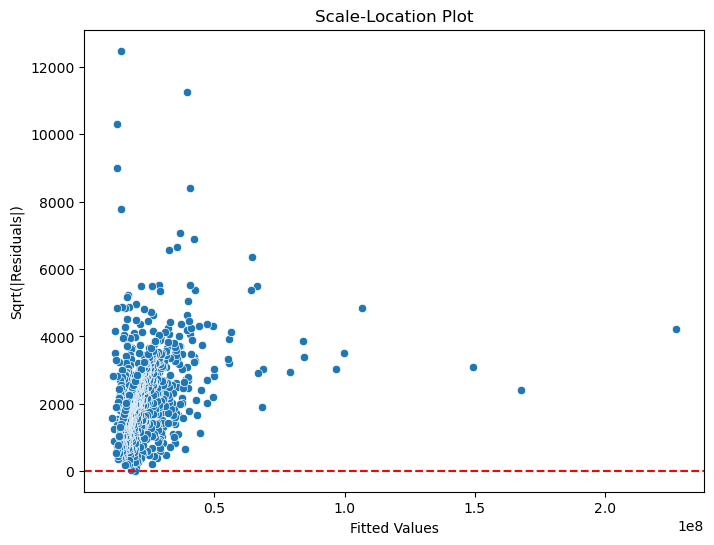

In [71]:
import statsmodels.api as sm

# Add a constant to the independent variables (for the intercept in the regression model)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Get the fitted values (y_hat) and residuals (y - y_hat)
fitted_values = model.fittedvalues
residuals = model.resid

# Standardize residuals (sqrt of absolute residuals)
standardized_residuals = np.sqrt(np.abs(residuals))

# Create the Scale-Location plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

#Add label and title
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')
plt.show()

# Testing Normality using QQ plot

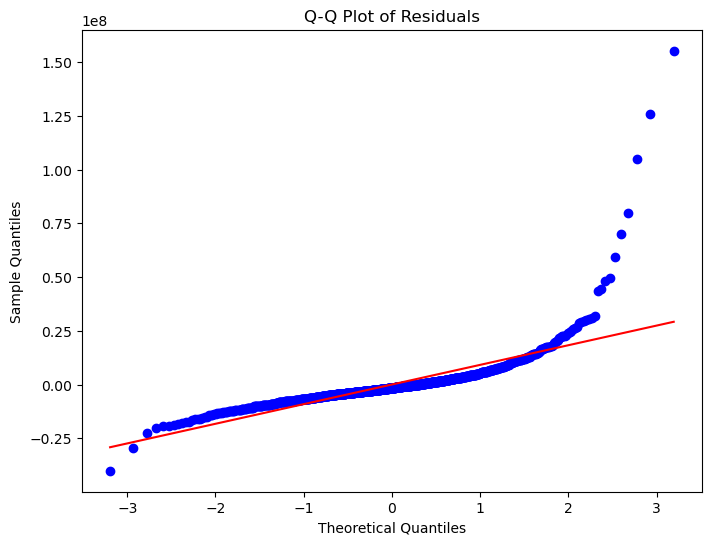

In [87]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

X = X.dropna()
y = y[X.index]  # Make sure y corresponds to the filtered X
X = X.fillna(X.mean())  # Use mean to fill NaN values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Add constant to the independent variables (for intercept) and fit the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)

# Label axes and title
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Best lambda (λ) for Box-Cox transformation: -1.3594


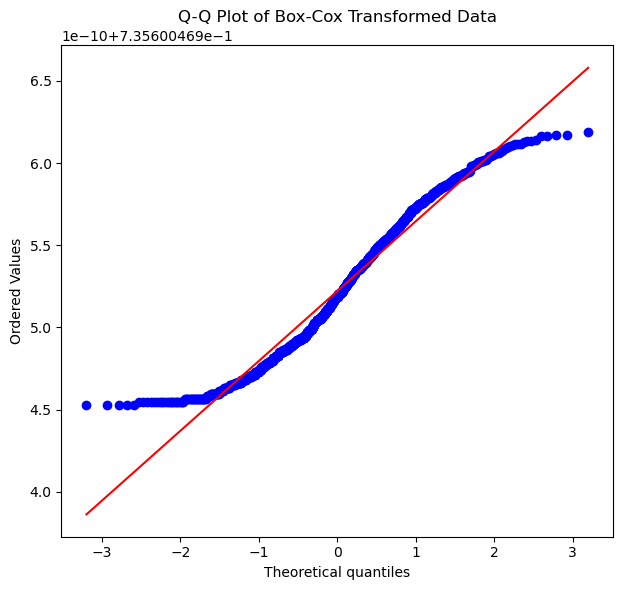

In [95]:
from scipy import stats

#We check if the values in y are positive (Box-Cox requires positive data). If they are, we apply the transformation
if (y <= 0).any():
    print("Warning: Some values in y are <= 0. You need to adjust these values before applying Box-Cox.")
else:
    #Apply Box-Cox transformation to the dependent variable y
    y_transformed, best_lambda = stats.boxcox(y)
    #Print the lambda used for transformation
    print(f"Best lambda (λ) for Box-Cox transformation: {best_lambda:.4f}")
    # Create a Q-Q plot of the original data (before transformation)
    plt.figure(figsize=(12, 6))
    # Transformed Data Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(y_transformed, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Box-Cox Transformed Data')
    plt.tight_layout()
    plt.show()

# Outlier Test

In [97]:
# Calculate the IQR (Interquartile Range) for each column in your dataset
Q1 = df[['subscribers', 'video views', 'uploads', 'category', 'created_year']].quantile(0.25)
Q3 = df[['subscribers', 'video views', 'uploads', 'category', 'created_year']].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers (values outside 1.5*IQR)
outliers = ((df[['subscribers', 'video views', 'uploads', 'category', 'created_year']] < (Q1 - 1.5 * IQR)) | 
            (df[['subscribers', 'video views', 'uploads', 'category', 'created_year']] > (Q3 + 1.5 * IQR)))

# Show rows with outliers
outlier_rows = df[outliers.any(axis=1)]
print(outlier_rows)

                       Youtuber  subscribers   video views  category  \
0                      T-Series    245000000  2.280000e+11         8   
1                YouTube Movies    170000000  0.000000e+00         4   
2                       MrBeast    166000000  2.836884e+10         3   
3    Cocomelon - Nursery Rhymes    162000000  1.640000e+11         2   
4                     SET India    159000000  1.480000e+11        14   
..                          ...          ...           ...       ...   
960                        NDTV     12500000  4.935793e+09         3   
963                   Zee Tamil     12500000  1.155219e+10         3   
964              Flowers Comedy     12500000  1.169108e+10         3   
966           Wave Music Bhakti     12500000  5.146004e+09         8   
979   DaniRep | +6 V�����������     12400000  6.933661e+09         5   

                          Title  uploads        Country   channel_type  \
0                      T-Series    20082          India      

# Cross Validation

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

df_clean = df.dropna(subset=['video views', 'uploads', 'category', 'created_year', 'subscribers'])
#Set up our X (dependent) and y (independent) variables
X = df_clean[['video views', 'uploads', 'category', 'created_year']]
y = df_clean['subscribers']

#Set up training and testing varibles and splitting the data into them
#Set up the Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
#Create a 5 fold cross validation 
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

#Print the r2, mean squared, and std scores for the cross validation
print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared scores: {cv_scores.mean():.2f}")
print(f"Standard deviation R-squared scores: {cv_scores.std():.2f}")

Cross-validation R-squared scores: [0.60866704 0.67945873 0.46238858 0.70224145 0.22859683]
Mean R-squared scores: 0.54
Standard deviation R-squared scores: 0.18


# kNN model

In [110]:
from sklearn.neighbors import KNeighborsRegressor

#Intialize the kNN model and fit it 
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

#Make preditions based on the model
y_pred_knn = knn.predict(X_test)

#Calculate the mse and r2 based on the kNN model then print them
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"Mean sqaured error for kNN: {mse_knn:.2f}")
print(f"R-sqaured for kNN: {r2_knn:.2f}")

Mean sqaured error for kNN: 97338054545454.55
R-sqaured for kNN: 0.28


# Confusion Matrix

In [113]:
from sklearn.preprocessing import KBinsDiscretizer

#Create 3 bins for the data to go into 
kbin = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

#Predict and the test the data and fit them into binds 
y_pred_binned = kbin.fit_transform(y_pred_knn.reshape(-1,1)).flatten()
y_test_binned = kbin.transform(y_test.values.reshape(-1,1)).flatten()

#Create a confusion matrix with the binned data
con_matrix = confusion_matrix(y_test_binned, y_pred_binned)
print(con_matrix)

[[161  12   2]
 [  8  10   0]
 [  0   4   1]]


C:\Users\jacqu\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


# Decision Tree

{'max_depth': 5, 'min_samples_leaf': 5}


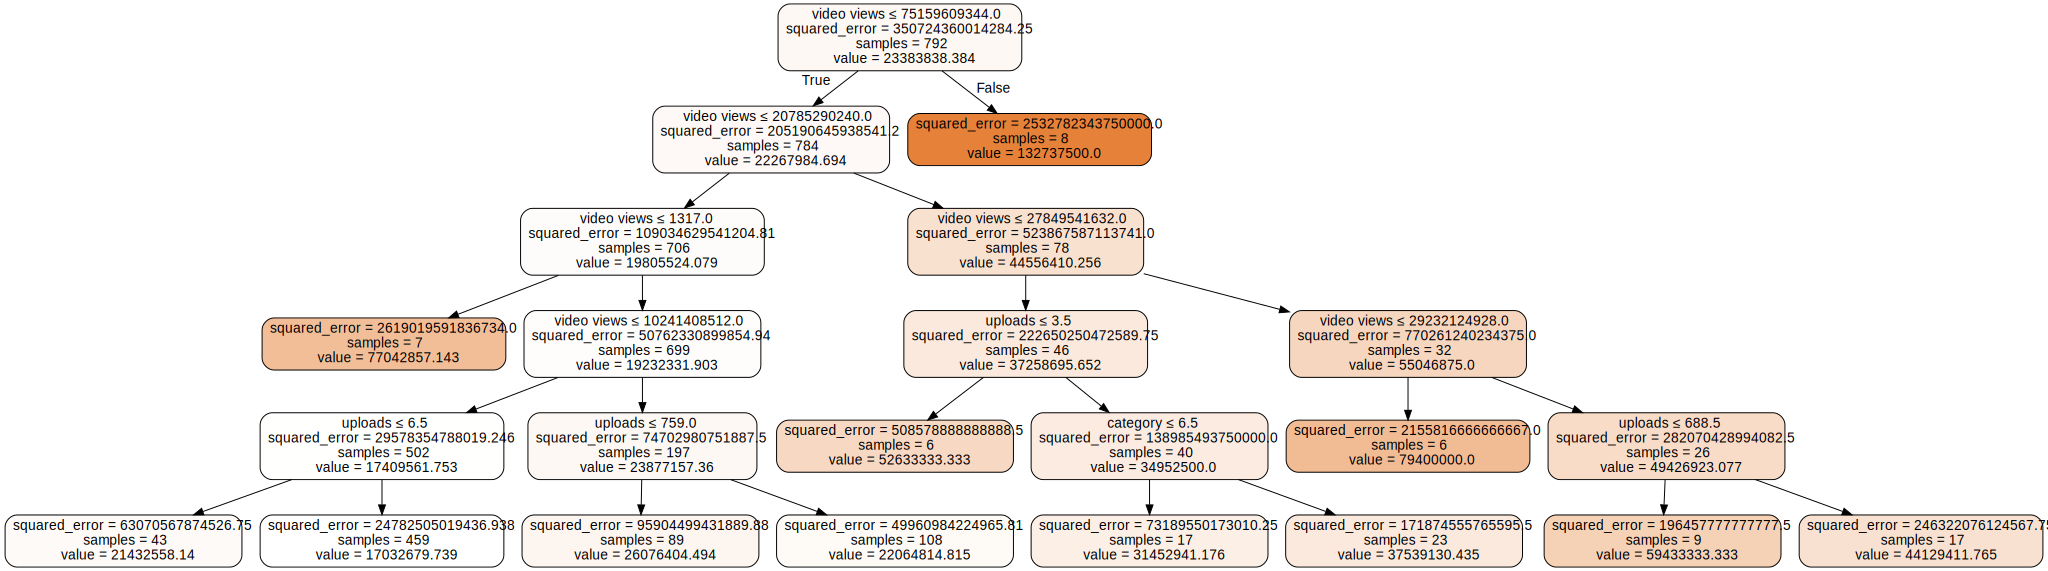

In [116]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
#Use the decision tree regressor for the subscriber, video views, uploads, and highest yearly earnings variables 
dt = DecisionTreeRegressor(random_state=42)

#To find the best parameters we have to set up a grid to complete the cross validation 
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  
    'min_samples_leaf': [1, 2, 5, 10]  
}

#Next we need to use GridSearch to take on a 5 fold cross validation and fit the model
search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

print(search.best_params_)

#We first need to train the treee regressor using the max_depth and min_samples_leaf best parameters from above
#Use search to find these best parameters
#Then again fit it to the model
best_dt = DecisionTreeRegressor(max_depth=search.best_params_['max_depth'], 
                                min_samples_leaf=search.best_params_['min_samples_leaf'],
                                random_state=42)
best_dt.fit(X_train, y_train)

#We need to generate the graphviz file and then create it from the dot data
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("project1_tree", view=True)  
graph